In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
df=pd.read_csv('./Desktop/data.csv',header=None)
df.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [3]:
#convert the data frame to numpy array 
df=df.to_numpy()
df

array([[842302, 'M', 17.99, ..., 0.2654, 0.4601, 0.1189],
       [842517, 'M', 20.57, ..., 0.18600000000000003, 0.275, 0.08902],
       [84300903, 'M', 19.69, ..., 0.243, 0.3613, 0.08757999999999999],
       ...,
       [926954, 'M', 16.6, ..., 0.1418, 0.2218, 0.0782],
       [927241, 'M', 20.6, ..., 0.265, 0.4087, 0.124],
       [92751, 'B', 7.76, ..., 0.0, 0.2871, 0.07039]], dtype=object)

In [4]:
#assign 30 features to the numpy array
from sklearn.preprocessing import LabelEncoder
X=df[:,2:]#the features terms, or the features; 
y=df[:,1]#the results, or the labels
#encode the categorical data into the numerical values with LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)#encode and binarize the diagnosis results
le.transform(['M',"B"])

array([1, 0])

In [5]:
#split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout


In [7]:
#define the ANN
model=Sequential()
model.add(Input(shape=(30,)))
model.add(Dense(1,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [9]:
#start the training
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
#to convert the numpy data into int, such that they can be further converted into tensor
X_train=np.asarray(X_train).astype(np.int)
X_test=np.asarray(X_test).astype(np.int)
y_train=np.asarray(y_train).astype(np.int)
y_test=np.asarray(y_test).astype(np.int)

In [11]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 0s 962us/sample - loss: 0.6923 - accuracy: 0.6256 - val_loss: 0.6912 - val_accuracy: 0.6316
Epoch 2/100
398/398 [==============================] - 0s 61us/sample - loss: 0.6904 - accuracy: 0.6256 - val_loss: 0.6891 - val_accuracy: 0.6316
Epoch 3/100
398/398 [==============================] - 0s 58us/sample - loss: 0.6886 - accuracy: 0.6256 - val_loss: 0.6875 - val_accuracy: 0.6316
Epoch 4/100
398/398 [==============================] - 0s 59us/sample - loss: 0.6871 - accuracy: 0.6256 - val_loss: 0.6859 - val_accuracy: 0.6316
Epoch 5/100
398/398 [==============================] - 0s 59us/sample - loss: 0.6856 - accuracy: 0.6256 - val_loss: 0.6841 - val_accuracy: 0.6316
Epoch 6/100
398/398 [==============================] - 0s 57us/sample - loss: 0.6840 - accuracy: 0.6256 - val_loss: 0.6827 - val_accuracy: 0.6316
Epoch 7/100
398/398 [==============================] - 0s 62us/sample - loss:

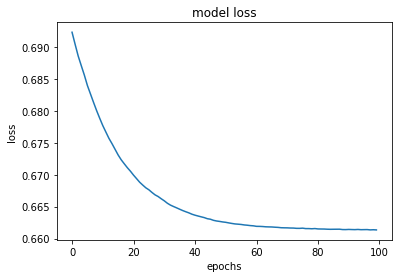

In [15]:
import matplotlib.pyplot as plt
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.epoch,history.history.get('loss'))

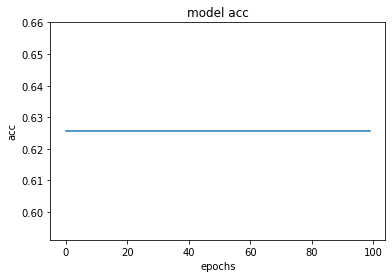

In [16]:
import matplotlib.pyplot as plt
plt.title('model acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(history.epoch,history.history.get('accuracy'))